In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df.head()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,0.0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,No,0.0,0.0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,Yes,20.0,0.0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,Yes,30.0,0.0,0,1,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,Yes,23.0,0.0,0,0,No,285.0,130.0,84.0,23.10,85.0,85.0,0


## Data Preprocessing

In [4]:
df.isnull().sum()

Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.shape

(4240, 16)

In [6]:
df.BMI.mean()

25.800800758114182

In [7]:
df.totChol.mean()

236.69952267303103

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(df[['BMI']])
df.BMI = imp.transform(df[['BMI']])
df.isnull().sum()

Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(df[['totChol']])
df.totChol = imp.transform(df[['totChol']])
df.isnull().sum()

Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [11]:
df.shape

(3680, 16)

In [12]:
df.dtypes

Sex                 object
age                  int64
education          float64
currentSmoker       object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [14]:
df = pd.get_dummies(df,columns=['Sex','currentSmoker','diabetes'], drop_first=True)

In [15]:
df.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Sex_male,currentSmoker_Yes,diabetes_Yes
0,39,4.0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0,0
1,46,2.0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,0,0
2,48,1.0,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1,0
3,61,3.0,30.0,0.0,0,1,225.0,150.0,95.0,28.58,65.0,103.0,1,0,1,0
4,46,3.0,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,1,0


## Exploratory Analysis and Visualizations

<AxesSubplot:>

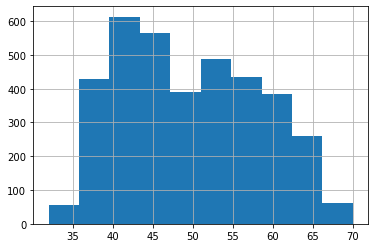

In [17]:
df.age.hist()

In [36]:
a=df.age.min()
b=df.age.max()
c=df.age.mean()
print('The minimum age is:', a)
print('The maximum age is:', b)
print('The mean age is:',c)


The minimum age is: 32
The maximum age is: 70
The mean age is: 49.566847826086956


In [40]:
from scipy.stats import shapiro

stat,p = shapiro(df.age)
print('Statistics=%.3f, p=%.3f' %(stat,p))

# interpretation
alpha = 0.05

if p>alpha:
    print('Sample looks Gausian because it does not reject the H0.')
else:
    print('Sample does not look Gausian because it fails to reject the H0.')

Statistics=0.966, p=0.000
Sample does not look Gausian because it fails to reject the H0.


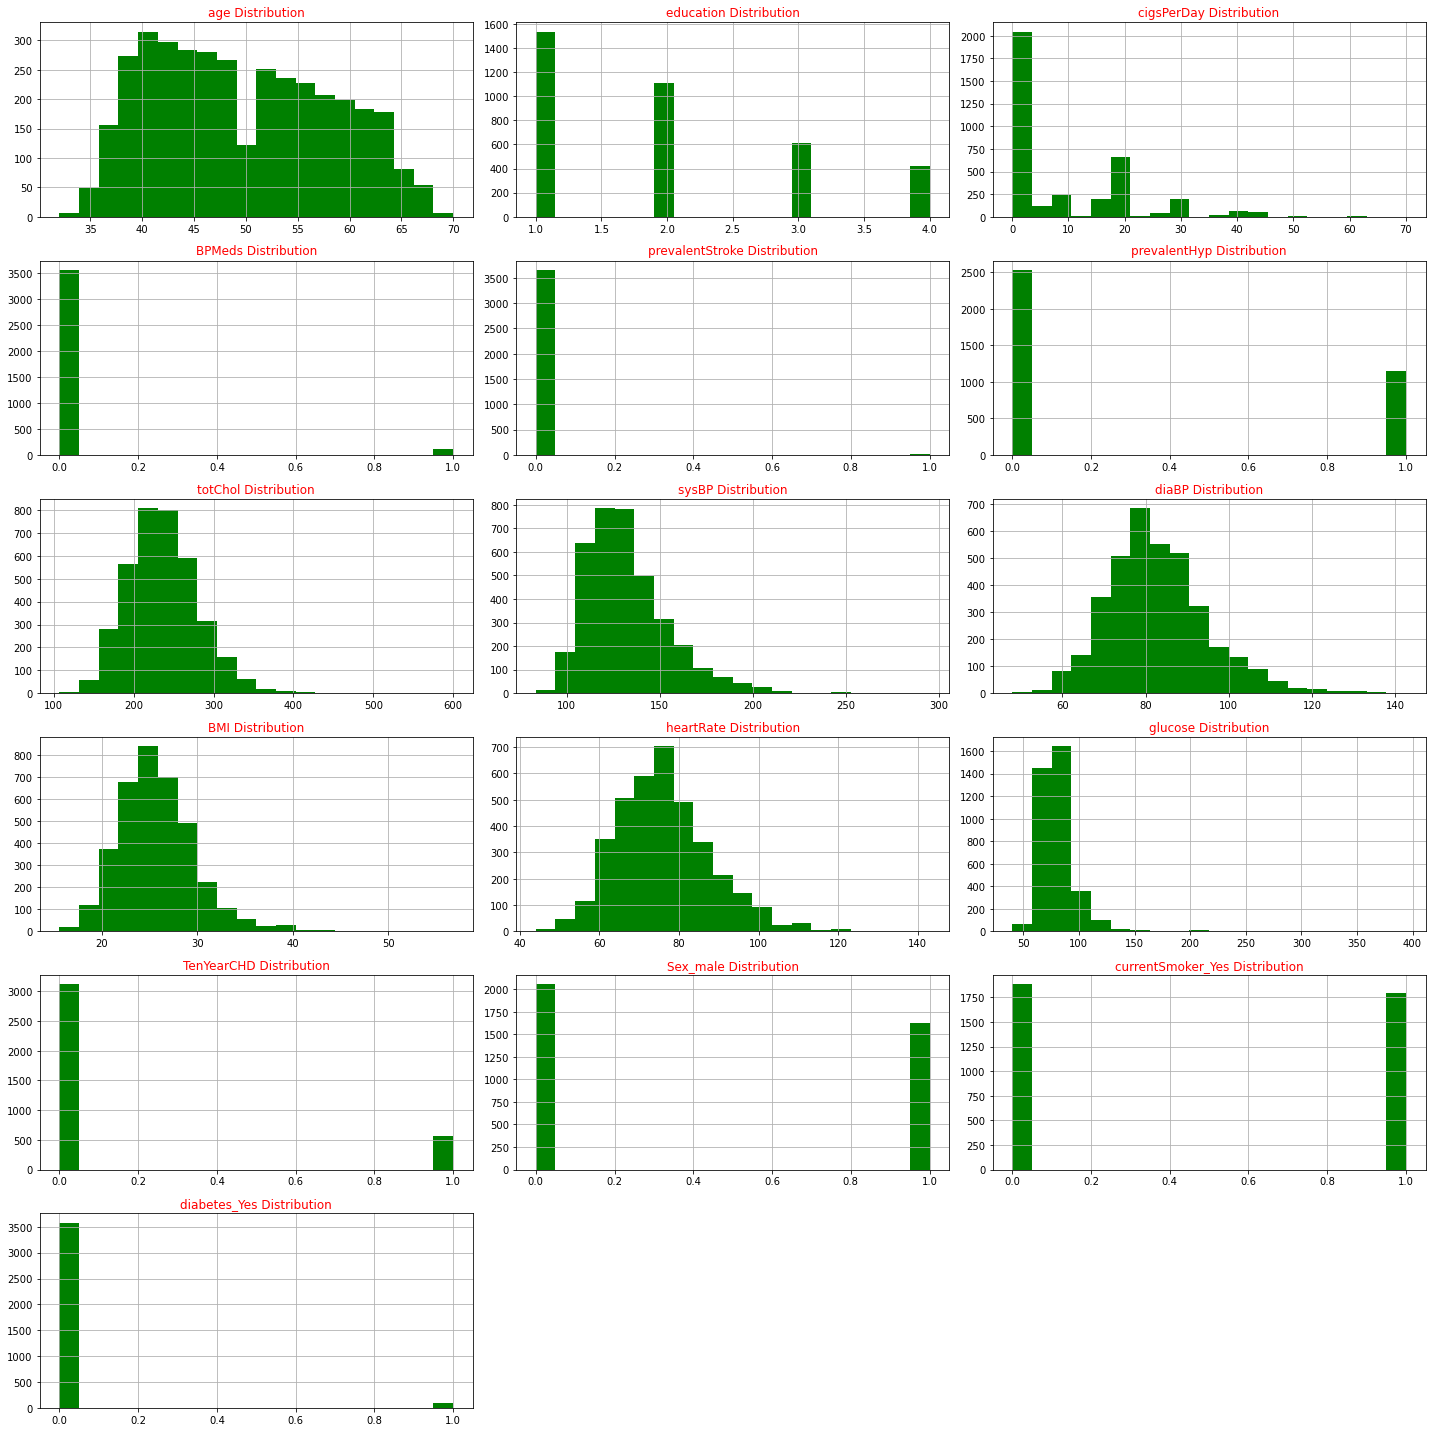

In [62]:
def draw_histograms(dframe, feats,rows,cols):
    fig = plt.figure(figsize=(20,20))
    for i,feature in enumerate(feats):
        ax=fig.add_subplot(rows,cols,i+1)
        dframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+' Distribution', color='red')
    fig.tight_layout()
    plt.show()

draw_histograms(df,df.columns,6,3)